# <span style="color:darkblue"> QTM 151 - Quiz 5 </span>

## Try to submit as an HTML file

<font size = "5">
Print your name below

In [1]:
# Write your answer here

print("Anish Nayak")

Anish Nayak


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Write the following message as a comment: <br>

"I will abide by Emory's code of conduct"


In [ ]:
# Write your own code

# I will abide by Emory's code of conduct 



<font size = "5">

Import the libraries "matplotlib.pyplot" and "pandas"

In [2]:
# Write your answer here

import matplotlib.pyplot as plt
import pandas as pd



In this quiz, we will work with a World Bank <br>
dataset on the proportion of urban population across <br>
countries, from 2016-2020.

- This is an example of a "panel"/"longitudinal" dataset <br>
 which contains information about the same unit (country) <br>
 over time.
 - This is in "long" format (see Lecture 22)


<font size = "5">

(a) Import and parse dates

<font size = "3">

- Import "data_raw/wdi_long.csv"
- Create a new column called "date" which uses ```pd.to_datetime(...,format = ...)``` <br>
to convert year to a date format
- To get full points use wild cards to establish the format. To get full points,<br>
 set the "format" option using wildcards as in Lecture 20.


In [8]:
# Write your own code


wdi_long = pd.read_csv('data_raw/wdi_long.csv')

wdi_long['date'] = pd.to_datetime(wdi_long['year'], format='%Y')

print(wdi_long)









      year year_code           country_name country_code  prop_urban  \
0     2016    YR2016            Afghanistan          AFG      25.020   
1     2016    YR2016                Albania          ALB      58.421   
2     2016    YR2016                Algeria          DZA      71.459   
3     2016    YR2016         American Samoa          ASM      87.198   
4     2016    YR2016                Andorra          AND      88.248   
...    ...       ...                    ...          ...         ...   
1080  2020    YR2020  Virgin Islands (U.S.)          VIR      95.939   
1081  2020    YR2020     West Bank and Gaza          PSE      76.719   
1082  2020    YR2020            Yemen, Rep.          YEM      37.908   
1083  2020    YR2020                 Zambia          ZMB      44.629   
1084  2020    YR2020               Zimbabwe          ZWE      32.242   

           date  
0    2016-01-01  
1    2016-01-01  
2    2016-01-01  
3    2016-01-01  
4    2016-01-01  
...         ...  
1080 2020

<font size = "5">

(b) Plot multiple time series

<font size = "3">

- Sort ```wdi_long``` by ```country_name``` and ```year``` in ascending order. <br>
Call this new dataset, ```wdi_sorted```

HINT: See Lecture 10a for how to sort. You can sort by multiple <br>
variables by entering them as a list ```[[...]]``` <br>

NOTE: Sorting is very important when using time series data, <br>
particularly for plotting and data cleaning, since observations are ordered <br>
in sequence from earliest to latest.



In [9]:
# Write your own code


wdi_sorted = wdi_long.sort_values(by=['country_name', 'year'])
print(wdi_sorted)



      year year_code country_name country_code  prop_urban       date
0     2016    YR2016  Afghanistan          AFG      25.020 2016-01-01
217   2017    YR2017  Afghanistan          AFG      25.250 2017-01-01
434   2018    YR2018  Afghanistan          AFG      25.495 2018-01-01
651   2019    YR2019  Afghanistan          AFG      25.754 2019-01-01
868   2020    YR2020  Afghanistan          AFG      26.026 2020-01-01
...    ...       ...          ...          ...         ...        ...
216   2016    YR2016     Zimbabwe          ZWE      32.296 2016-01-01
433   2017    YR2017     Zimbabwe          ZWE      32.237 2017-01-01
650   2018    YR2018     Zimbabwe          ZWE      32.209 2018-01-01
867   2019    YR2019     Zimbabwe          ZWE      32.210 2019-01-01
1084  2020    YR2020     Zimbabwe          ZWE      32.242 2020-01-01

[1085 rows x 6 columns]


<font size = "5">

(c) Flag subset of data and plot

<font size = "3">

- For the sorted dataset, subset all entries of ```wdi_sorted``` from part (b) <br>
 where ```country_name``` to equal ```"United States"``` using ```.query()```. <br>
Call this new dataset ```wdi_usa```
- Create a line plot with year on the x-axis and ```prop_urban``` on the y-axis
- Label the x-axis, the y-axis, and the title

HINT: You can use ```.query()``` to subset to "United States" by using <br>
escape characters, e.g. ``` country_name == \"United States\" ```.  <br>
See Lecture 10a for how to use query.


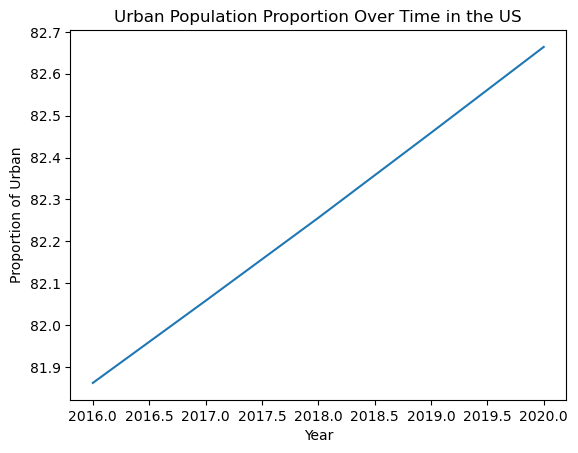

In [23]:
# Write your own code



wdi_usa = wdi_sorted.query('country_name == "United States"')


plt.plot(wdi_usa['year'], wdi_usa['prop_urban'])
plt.title('Urban Population Proportion Over Time in the US')
plt.xlabel('Year')
plt.ylabel('Proportion of Urban')
plt.show()






<font size = "5">

(d) Obtain yearly growth rates by country

<font size = "3">

- For this question you will use ```wdi_sorted``` that you created in part (b)
- Use ```.groupby()```, ```.diff()```, and ```.shift()``` to compute <br>
the yearly growth rates in the urban population by country. 
- Store your results in a new column of ```wdi_sorted``` called <br>
``` growth_prop_urban```. 

HINT: See Lecture 22


In [18]:
# Write your own code



wdi_sorted['growth_prop_urban'] = wdi_sorted.groupby('country_name')['prop_urban'].transform(lambda x: x.diff() / x.shift())

print(wdi_sorted[['country_name', 'year', 'prop_urban', 'growth_prop_urban']])











     country_name  year  prop_urban  growth_prop_urban
0     Afghanistan  2016      25.020                NaN
217   Afghanistan  2017      25.250           0.009193
434   Afghanistan  2018      25.495           0.009703
651   Afghanistan  2019      25.754           0.010159
868   Afghanistan  2020      26.026           0.010561
...           ...   ...         ...                ...
216      Zimbabwe  2016      32.296                NaN
433      Zimbabwe  2017      32.237          -0.001827
650      Zimbabwe  2018      32.209          -0.000869
867      Zimbabwe  2019      32.210           0.000031
1084     Zimbabwe  2020      32.242           0.000993

[1085 rows x 4 columns]


<font size = "5">

(e) Obtain average yearly growth rates

<font size = "3">

- This question follows-up to part (d).
- Use ```.groupby()```, ```.agg()``` to compute the average of ```growth_prop_urban```

HINT: See Lecture 14 for how to compute grouped statistics. <br>


In [20]:

avg_growth_rates = wdi_sorted.groupby('country_name')['growth_prop_urban'].agg('mean')
print(avg_growth_rates)


country_name
Afghanistan              0.009904
Albania                  0.015434
Algeria                  0.007862
American Samoa          -0.000129
Andorra                 -0.000942
                           ...   
Virgin Islands (U.S.)    0.001200
West Bank and Gaza       0.003587
Yemen, Rep.              0.017303
Zambia                   0.012664
Zimbabwe                -0.000418
Name: growth_prop_urban, Length: 217, dtype: float64


<font size = "5">

(f) Convert dataset to wide format

<font size = "3">

- Convert "wdi_sorted" from long to wide, using the following arguments: <br>
```
   index = 'country_name'
   columns = 'year'
   values =  'prop_urban'
```
- Display the dataset to check that it is in wide format

HINT: See Lecture 22 for details on how to use ```pd.pivot()```

In [21]:
# Write your own code

wdi_wide = wdi_sorted.pivot(index='country_name', columns='year', values='prop_urban')

print(wdi_wide)




year                     2016    2017    2018    2019    2020
country_name                                                 
Afghanistan            25.020  25.250  25.495  25.754  26.026
Albania                58.421  59.383  60.319  61.229  62.112
Algeria                71.459  72.052  72.629  73.189  73.733
American Samoa         87.198  87.170  87.153  87.147  87.153
Andorra                88.248  88.150  88.062  87.984  87.916
...                       ...     ...     ...     ...     ...
Virgin Islands (U.S.)  95.480  95.603  95.721  95.832  95.939
West Bank and Gaza     75.628  75.894  76.164  76.440  76.719
Yemen, Rep.            35.394  36.016  36.642  37.273  37.908
Zambia                 42.438  42.976  43.521  44.072  44.629
Zimbabwe               32.296  32.237  32.209  32.210  32.242

[217 rows x 5 columns]
